In [178]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [4]:
#read the dataset
df = pd.read_csv("/content/WEC_Sydney_100.csv")

In [7]:
#data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 5.3 MB


In [9]:
#print the first five rows of df
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,...,Power53,Power54,Power55,Power56,Power57,Power58,Power59,Power60,Power61,Power62,Power63,Power64,Power65,Power66,Power67,Power68,Power69,Power70,Power71,Power72,Power73,Power74,Power75,Power76,Power77,Power78,Power79,Power80,Power81,Power82,Power83,Power84,Power85,Power86,Power87,Power88,Power89,Power90,Power91,Power92,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,397.46,75.07,397.18,149.14,349.00,198.0,598.0,0.0,597.46,75.07,597.18,149.14,549.00,198.0,1198.0,0.0,1197.46,75.07,1197.18,149.14,1149.00,198.0,1398.0,0.0,1397.46,75.07,1397.18,149.14,1349.00,198.0,1.0,201.0,1.00,270.00,1.00,340.00,50.00,398.0,598.0,200.0,...,66364.92,64161.59,63435.22,58221.97,64576.31,63044.49,64933.19,56313.07,82795.39,84585.52,85096.46,77649.85,55886.27,56372.00,57918.60,58600.37,60253.47,60488.25,61874.93,53094.16,69391.33,71935.61,77298.95,79626.63,59840.57,57491.68,58430.15,61982.82,54553.93,53167.08,55939.88,59140.04,57003.66,56602.50,58926.96,57552.46,65347.46,62446.34,60206.57,59383.26,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,597.18,80.53,593.59,150.00,477.58,198.0,798.0,0.0,797.18,80.53,793.59,150.00,677.58,198.0,1398.0,0.0,1397.18,80.53,1393.59,150.00,1277.58,198.0,398.0,200.0,397.18,280.53,393.59,350.00,277.58,398.0,598.0,200.0,597.18,280.53,593.59,350.00,477.58,398.0,798.0,200.0,...,71415.75,70896.96,69947.33,60346.14,59716.87,58245.29,56171.84,55815.72,63451.62,59319.54,54007.52,47955.08,70923.81,64910.63,61037.73,51116.88,81640.28,76592.95,70247.26,60977.72,90291.15,88520.52,86721.19,69545.11,49944.49,51155.51,53776.98,61979.83,49093.59,49514.07,50107.00,52566.39,56936.28,54140.92,51051.88,51522.49,61896.30,57763.02,57931.87,57171.84,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,797.07,76.64,792.74,155.74,684.67,198.0,998.0,0.0,997.07,76.64,992.74,155.74,884.67,198.0,1198.0,0.0,1197.07,76.64,1192.74,155.74,1084.67,198.0,1398.0,0.0,1397.07,76.64,1392.74,155.74,1284.67,198.0,198.0,200.0,197.07,276.64,192.74,355.74,84.67,398.0,398.0,200.0,...,85922.12,87403.02,87220.56,70499.14,64592.28,63001.17,62448.01,62236.31,68055.26,67666.85,66045.74,57386.14,83691.79,84650.21,84107.29,65661.85,59774.57,56143.24,53403.49,52107.67,61421.20,58969.64,55859.13,52168.09,60399.82,65424.77,65144.99,56804.30,81886.82,82104.66,81354.80,70377.43,59765.33,60133.31,64157.04,66646.44,48923.30,53377.83,59115.40,61173.69,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,397.07,76.56,392.74,154.90,349.00,198.0,798.0,0.0,797.07,76.56,792.74,154.90,749.00,198.0,998.0,0.0,997.07,76.56,992.74,154.90,949.00,198.0,1398.0,0.0,1397.07,76.56,1392.74,154.90,1349.00,198.0,198.0,200.0,197.07,276.56,192.74,354.90,149.00,398.0,601.0,201.0,...,78067.24,78883.15,80077.82,61297.46,58001.35,61923.60,67096.59,63339.16,74371.87,71018.52,67851.72,61732.26,90332.68,86282.85,84337.25,64634.42,65260.06,61127.73,61315.03,61693.85,81139.11,81998.47,83518.38,64573.08,59804.77,62069.53,61170.90,60164.35,62680.98,57665.52,57887.01,56190.74,65415.00,62218.46,61333.26,58748.16,65170.20,62718.09,61963.36,59301.75,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,597.46,75.07,597.18,149.14,549.00,198.0,998.0,0.0,997.46,75.07,997.18,149.14,949.00,198.0,1398.0,0.0,1397.46,75.07,1397.18,149.14,1349.00,198.0,398.0,200.0,397.46,275.07,397.18,349.14,349.00,398.0,598.0,200.0,597.46,275.07,597.18,349.14,549.00,398.0,798.0,200.0,...,95999.51

In [10]:
df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,...,Power53,Power54,Power55,Power56,Power57,Power58,Power59,Power60,Power61,Power62,Power63,Power64,Power65,Power66,Power67,Power68,Power69,Power70,Power71,Power72,Power73,Power74,Power75,Power76,Power77,Power78,Power79,Power80,Power81,Power82,Power83,Power84,Power85,Power86,Power87,Power88,Power89,Power90,Power91,Power92,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.00000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2.318000e+03
mean,177.162584,8.159819,204.669676,64.119892,228.071639,124.794698,217.177019,163.846674,549.225039,18.989965,565.903503,66.585841,586.052308,136.797882,555.436648,174.793313,898.268952,24.386903,926.977222,79.098115,702.187735,163.521777,662.695858,200.226221,967.724409,56.819776,994.556557,118.957248,1016.534629,180.769728,962.385393,217.242584,908.414633,121.406829,934.507990,180.56679,956.400022,230.189965,921.002675,266.686937,602.926329,213.230716,634.555703,266.615997,648.238520,320.772468,614.403503,358.367899,734.456881,237.843175,...,68566.618106,67999.150846,68083.647179,62809.523779,68035.066255,68078.325362,68390.128572,65695.364888,68786.183676,67896.916376,67090.476437,62385.794487,68589.703921,68004.945720,67939.665479,63481.039267,69072.607614,69422.689953,64878.281872,59488.572977,65410.664970,64988.574008,64143.605233,59278.356264,70593.011670,70744.981747,70854.100789,65641.698421,63189.093883,62615.947550,62335.148089,61337.692912,58721.668050,58615.521242,60166.289301,61389.495332,62897.057088,62937.785168,60472.549521,60079.156242,64859.738123,64579.924185,64173.224935,62303.133943,78016.319163,79206.888723,79408.973930,73716.316540,0.677558,7.167217e+06
std,174.211383,52.395345,172.438092,79.224562,181.670898,96.549059,226.003884,109.445413,206.346402,97.283758,226.499904,80.924148,252.952638,88.130582,336.729819,91.446102,279.925182,84.610003,314.943727,94.362793,372.885061,88.039053,306.716949,88.701635,396.773619,132.624893,358.762746,111.287363,327.940042,102.020294,296.676726,99.017514,473.783409,144.417242,474.263026,130.84754,473.775809,120.490595,481.973767,123.723546,512.749549,137.707834,482.801631,108.445208,466.561703,102.969331,437.989602,95.954595,383.808764,102.851927,...,10662.292510,10769.464529,10251.960246,6419.393159,9797.688985,9905.352373,10764.062102,11558.634117,11497.562852,11387.835332,11250.845206,8268.266455,11444.340736,10833.330227,10683.231424,8287.344729,11439.231433,12736.148109,10970.806996,7300.432130,9987.453314,9281.793395,8577.459072,6433.994917,12176.361168,11957.146636,11979.998526,10402.503810,9858.785989,10027.726299,9634.741413,5870.386780,7268.864976,6884.129591,6653.466871,5580.597974,8443.824968

In [11]:
#checking the correlation between the features
correlation = df.corr()
print(correlation)

                   X1        Y1        X2        Y2  ...   Power99  Power100        qW  Total_Power
X1           1.000000 -0.034881  0.783537  0.355123  ... -0.037404 -0.348752 -0.619046    -0.646574
Y1          -0.034881  1.000000  0.033723  0.114210  ... -0.210102  0.112654  0.081276     0.098505
X2           0.783537  0.033723  1.000000  0.060164  ... -0.263693 -0.032276 -0.473338    -0.497733
Y2           0.355123  0.114210  0.060164  1.000000  ...  0.057008 -0.235218 -0.258693    -0.269956
X3           0.664383  0.168309  0.865011 -0.021378  ... -0.413115  0.132155 -0.372082    -0.386883
...               ...       ...       ...       ...  ...       ...       ...       ...          ...
Power98     -0.039002 -0.183879 -0.249736  0.020680  ...  0.822807 -0.267783  0.063329     0.076519
Power99     -0.037404 -0.210102 -0.263693  0.057008  ...  1.000000 -0.203896  0.030976     0.059592
Power100    -0.348752  0.112654 -0.032276 -0.235218  ... -0.203896  1.000000  0.387624     0.416024


In [12]:
#splitting the data into dependent and independent variables
I_v = df.drop(columns=['Total_Power'])
D_v = df['Total_Power']

In [13]:
#print the shape of the independent and dependent variables
I_v.shape

(2318, 301)

In [149]:
#split the data into to 80% training - 20% testing
I_train, I_test, D_train, D_test = train_test_split(I_v, D_v, test_size=0.20)

In [159]:
#fitting the model
regressor = DecisionTreeRegressor(criterion = 'poisson', max_depth = 15, max_features= 'sqrt', random_state = 0)
regressor.fit(I_train,D_train)

DecisionTreeRegressor(criterion='poisson', max_depth=15, max_features='sqrt',
                      random_state=0)

In [151]:
y_pred_test = regressor.predict(I_test)
y_pred_test

array([7205436.37333333, 7304092.54      , 7258766.2       ,
       7185252.54428571, 7196990.22      , 7295406.54      ,
       7357367.85      , 7276371.11      , 7017266.39      ,
       7268309.15      , 7163270.145     , 7114007.29      ,
       7169825.7775    , 7038654.06      , 7237270.8040625 ,
       7230668.86      , 7226136.24      , 7165698.89      ,
       7242551.42      , 7258766.2       , 7076453.41      ,
       7168407.82      , 7283629.93      , 7146937.35      ,
       7309508.07      , 7147690.16      , 6814552.39      ,
       7126065.74      , 7227849.61      , 7258766.2       ,
       7276371.11      , 7181933.6725    , 7304092.54      ,
       7258766.2       , 7189834.05108108, 7208115.21      ,
       7206458.5       , 7349789.01      , 7291462.52      ,
       7242155.05      , 7172634.24666667, 6950219.93      ,
       6998846.87      , 7303589.25      , 7227849.61      ,
       6816198.02      , 7016760.05      , 7059628.12      ,
       7255804.23      ,

In [181]:
# Calculate Mean Absolute Error (MAE)
mae_test = mean_absolute_error(D_test, y_pred_test)
print("The MAE is:", mae_test)

The MAE is: 18640.9590491914


In [182]:
mse = mean_squared_error(D_test, y_pred_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 1837853157.9263809


In [153]:
#to check the accuracy
r2 = r2_score(D_test, y_pred_test)

print("The R-squared Score is:", r2)

The R-squared Score is: 0.8286421413212698


/tmp/ipykernel_10602/3728922906.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/tmp/ipykernel_10602/3728922906.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



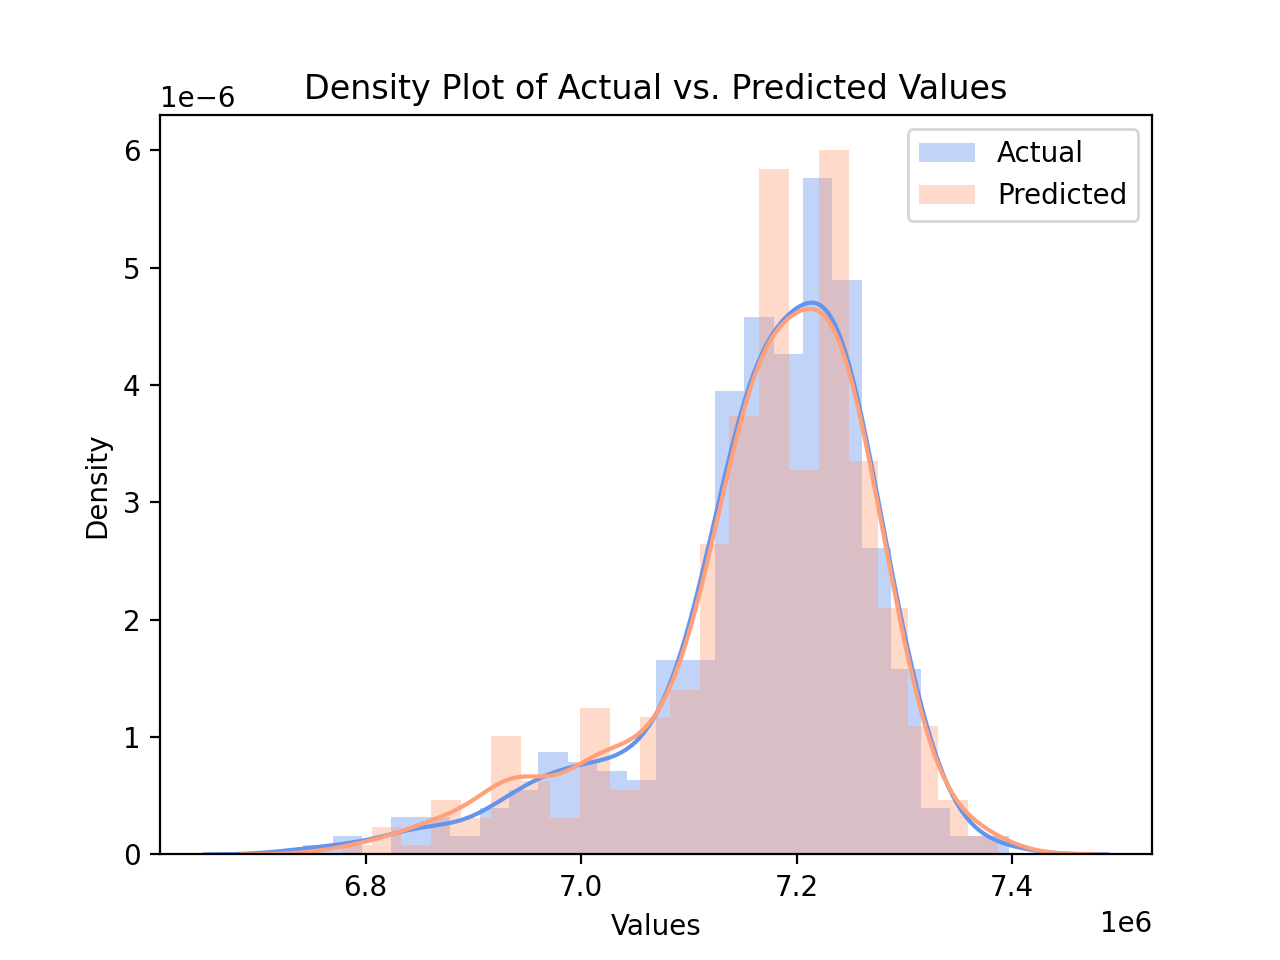

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(D_test, color='#6495ED', label='Actual')
sns.distplot(y_pred_test, color='#FFA07A', label='Predicted')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()


My observation to criterion was: when I am Using squared error, the error rate is increasing as well as the model accuracy performed only an accuracy of 77 with max depth 10.

